In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Задача
В приложенных файлах вы увидите данные по прохождению студентами тестов на образовательной платформе. Такие данные могут быть использованы для построения персонализированных ИИ-ассистентов для поддержки обучения студента. На текущем этапе сосредоточимся на начальном этапе — сборе и подготовке данных.

**Вам необходимо:**  
Используя библиотеку pandas (или аналоги), проанализировать как можно больше характеристик, влияющих на успеваемость студентов.

https://www.kaggle.com/competitions/riiid-test-answer-prediction/data

## Загрузка данных

In [2]:
lectures = pd.read_csv("data/lectures.csv")
lectures

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question
...,...,...,...,...
413,32535,8,5,solving question
414,32570,113,3,solving question
415,32604,24,6,concept
416,32625,142,2,concept


In [3]:
questions = pd.read_csv("data/questions.csv")
questions

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
...,...,...,...,...,...
13518,13518,13518,3,5,14
13519,13519,13519,3,5,8
13520,13520,13520,2,5,73
13521,13521,13521,0,5,125


In [4]:
train = pd.read_csv("data/train-001.csv")
train

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False
...,...,...,...,...,...,...,...,...,...,...
101230327,101230327,428564420,2147482888,3586,0,22,0,1,18000.0,True
101230328,101230328,428585000,2147482888,6341,0,23,3,1,14000.0,True
101230329,101230329,428613475,2147482888,4212,0,24,3,1,14000.0,True
101230330,101230330,428649406,2147482888,6343,0,25,1,0,22000.0,True


## Анализ

Объединение таблиц

In [5]:
# Объединение данных по вопросам (только для content_type_id == 0)
questions_merge = train[train["content_type_id"] == 0].merge(
    questions, left_on="content_id", right_on="question_id", how="left"
)

# Объединение данных по лекциям (только для content_type_id == 1)
lectures_merge = train[train["content_type_id"] == 1].merge(
    lectures, left_on="content_id", right_on="lecture_id", how="left"
)

# Объединение двух датафреймов обратно в один train с сохранением всех данных
train = pd.concat([questions_merge, lectures_merge]).sort_values("row_id")

In [6]:
del lectures_merge, questions_merge, lectures, questions

### Общая информация о данных

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101230332 entries, 0 to 99271299
Data columns (total 18 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
 10  question_id                     float64
 11  bundle_id                       float64
 12  correct_answer                  float64
 13  part                            int64  
 14  tags                            object 
 15  lecture_id                      float64
 16  tag                             float64
 17  type_of                      

In [8]:
# Проверка наличия пропущенных значений
train.isnull().sum()

row_id                                   0
timestamp                                0
user_id                                  0
content_id                               0
content_type_id                          0
task_container_id                        0
user_answer                              0
answered_correctly                       0
prior_question_elapsed_time        2351538
prior_question_had_explanation      392506
question_id                        1959032
bundle_id                          1959032
correct_answer                     1959032
part                                     0
tags                               1959033
lecture_id                        99271300
tag                               99271300
type_of                           99271300
dtype: int64

In [9]:
# проверка наличия дубликатов
train.duplicated().sum()

0

In [10]:
# Корреляционный анализ
train.corr(numeric_only=True)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,question_id,bundle_id,correct_answer,part,lecture_id,tag
row_id,1.000000,-0.000010,0.999990,0.000866,-0.000151,0.001492,0.000158,-0.000303,0.000294,0.001104,0.001104,0.000230,0.001847,0.000172,0.000026
timestamp,-0.000010,1.000000,-0.000041,0.052931,0.000974,0.433359,0.000724,0.025452,0.013934,0.062655,0.062654,-0.001087,0.016918,0.005264,0.003216
user_id,0.999990,-0.000041,1.000000,0.000868,-0.000150,0.001498,0.000156,-0.000307,0.000308,0.001106,0.001106,0.000230,0.001847,0.000172,0.000027
content_id,0.000866,0.052931,0.000868,1.000000,0.414640,0.046304,-0.106668,-0.196960,0.151661,1.000000,1.000000,0.017385,0.456255,1.000000,0.036515
content_type_id,-0.000151,0.000974,-0.000150,0.414640,1.000000,-0.019647,-0.279818,-0.436912,NaN,NaN,NaN,NaN,-0.000037,NaN,NaN
task_container_id,0.001492,0.433359,0.001498,0.046304,-0.019647,1.000000,0.008532,0.061129,-0.013412,0.064442,0.064436,0.000058,0.027045,0.012928,0.006887
user_answer,0.000158,0.000724,0.000156,-0.106668,-0.279818,0.008532,1.000000,0.126471,0.014570,0.011568,0.011565,0.533106,0.029122,NaN,NaN
answered_correctly,-0.000303,0.025452,-0.000307,-0.196960,-0.436912,0.061129,0.126471,1.000000,-0.007900,-0.020850,-0.020851,-0.016896,-0.066835,NaN,NaN
prior_question_elapsed_time,0.000294,0.013934,0.000308,0.151661,NaN,-0.013412,0.014570,-0.007900,1.000000,0.151661,0.151623,0.013033,0.240963,NaN,NaN
question_id,0.001104,0.062655,0.001106,1.000000,NaN,0.064442,0.011568,-0.020850,0.151661,1.000000,1.000000,0.017385,0.543489,NaN,NaN


### Тепловая карта корреляций для числовых признаков

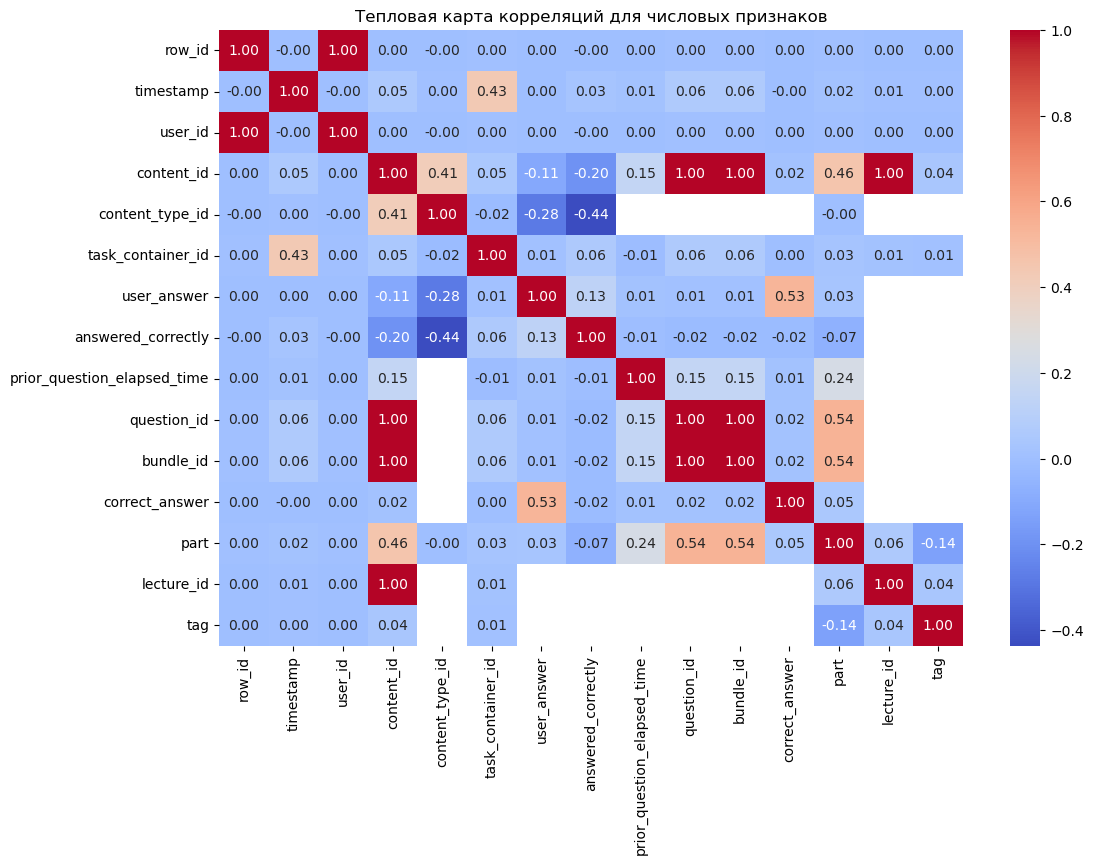

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Тепловая карта корреляций для числовых признаков")
plt.show()

### Влияние времени на успеваемость

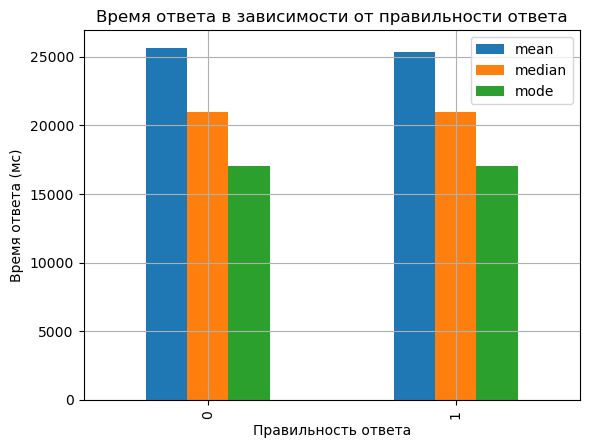

In [12]:
# Среднее, минимальное, максимальное, медианное и мода время ответа по группам правильности
avg_time_correct = train.groupby("answered_correctly")[
    "prior_question_elapsed_time"
].agg(["min", "max", "mean", "median"])

avg_time_correct["mode"] = train.groupby("answered_correctly")[
    "prior_question_elapsed_time"
].apply(lambda x: x.mode()[0] if not x.mode().empty else None)


# Визуализация
avg_time_correct.iloc[1:, 2:].plot(kind="bar")
plt.title("Время ответа в зависимости от правильности ответа")
plt.xlabel("Правильность ответа")
plt.ylabel("Время ответа (мс)")
plt.grid()
plt.show()

В среднем время ответа больше у тех, кто ответил неправильно, но незначительно

In [13]:
avg_time_correct

,min,max,mean,median,mode
answered_correctly,,,,,
-1,NaN,NaN,NaN,NaN,NaN
0,0.0,300000.0,25641.991586,21000.0,17000.0
1,0.0,300000.0,25309.977185,21000.0,17000.0


### Влияние наличие объяснений после предыдущего вопроса на правильность следующего ответа

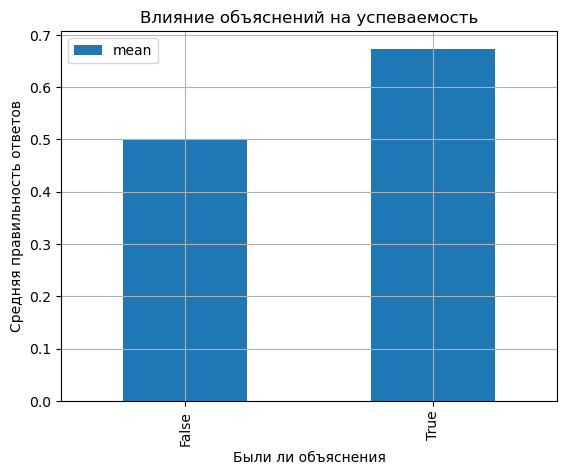

In [14]:
# Группировка данных по наличию объяснений
explanation_effect = (
    train[train["content_type_id"] == 0]
    .groupby("prior_question_had_explanation")["answered_correctly"]
    .agg(["mean"])
)

# Визуализация
explanation_effect.plot(kind="bar")
plt.title("Влияние объяснений на успеваемость")
plt.xlabel("Были ли объяснения")
plt.ylabel("Средняя правильность ответов")
plt.grid()
plt.show()

In [15]:
explanation_effect

,mean
prior_question_had_explanation,
False,0.500629
True,0.673189


Наличие объяснений явно повлияло на правильность ответа, а следовательно и на успеваемость

### Анализ успеваемости по темам и разделам

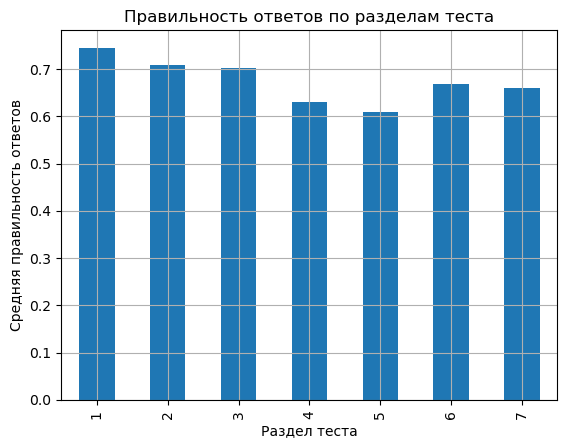

In [ ]:
# Средняя правильность по разделам теста (part)
train[train["content_type_id"] == 0].groupby("part")["answered_correctly"].mean().plot(
    kind="bar"
)
plt.title("Правильность ответов по разделам теста")
plt.xlabel("Раздел теста")
plt.ylabel("Средняя правильность ответов")
plt.grid()
plt.show()

Наиболее успешными по сдаче оказались разделы 1, 2 и 3, а наименее - 5, 4 и 7

### Процент правильно отвеченных вопросов

In [17]:
total_questions = train[train['content_type_id'] == 0].shape[0]
correct_answers = train[(train['content_type_id'] == 0) & (train['answered_correctly'] == 1)].shape[0]
correct_answer_percentage = (correct_answers / total_questions) * 100

print(f"Процент правильно отвеченных вопросов: {correct_answer_percentage:.2f}%")

Процент правильно отвеченных вопросов: 65.72%


### Распределение успеваемости

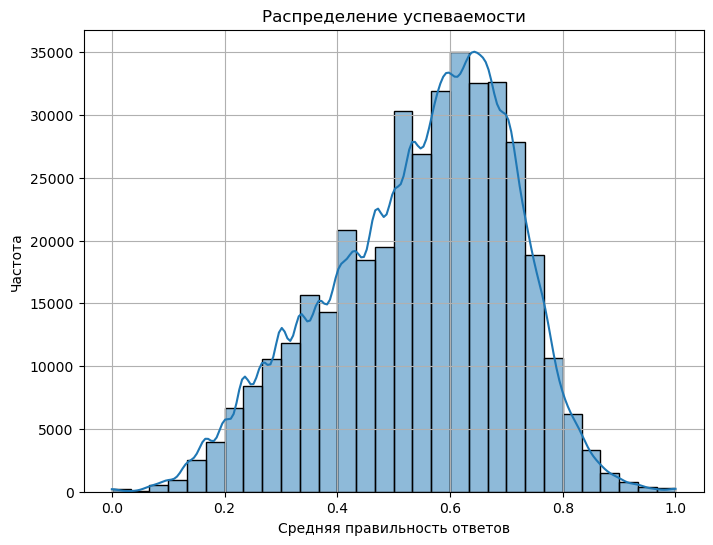

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(
    train[train["content_type_id"] == 0]
    .groupby("user_id")["answered_correctly"]
    .mean(),
    bins=30,
    kde=True,
)
plt.title("Распределение успеваемости")
plt.xlabel("Средняя правильность ответов")
plt.ylabel("Частота")
plt.grid()
plt.show()

### Влияние категорий лекций на успеваемость

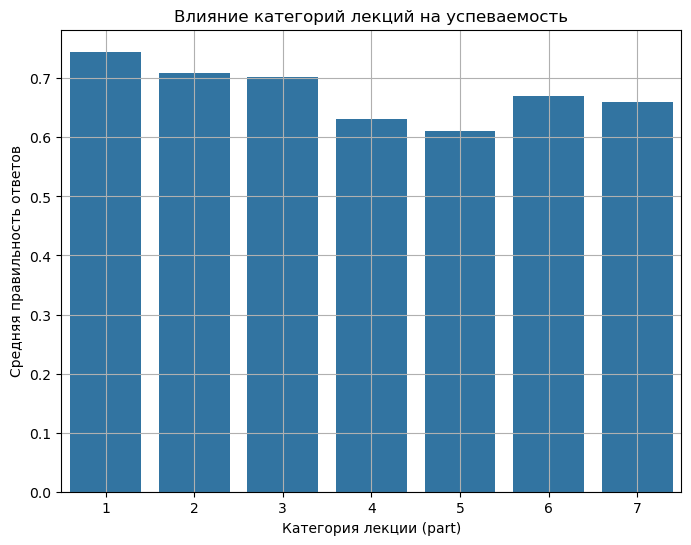

In [19]:
lecture_part_correctness = train[train['content_type_id'] == 0].groupby('part')['answered_correctly'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=lecture_part_correctness.index, y=lecture_part_correctness.values)
plt.title("Влияние категорий лекций на успеваемость")
plt.xlabel("Категория лекции (part)")
plt.ylabel("Средняя правильность ответов")
plt.grid()
plt.show()

Наиболее "успешные" категории - 1 и 2, наименее - 5 и 4

### Топ 10 тегов вопросов с самой высокой успеваемостью

In [7]:
train["tags"] = train["tags"].fillna("")
tags_series = train[train["tags"] != ""]["tags"].str.split().explode()
tags_correctness = (
    train.loc[train["content_type_id"] == 0, ["answered_correctly"]]
    .join(tags_series)
    .groupby("tags")["answered_correctly"]
    .mean()
)

In [14]:
tags_correctness.sort_values(ascending=False).head(10).to_frame()

,answered_correctly
tags,
68,0.863945
187,0.856020
130,0.853152
149,0.848015
40,0.813804
93,0.809775
70,0.802056
177,0.801152
51,0.796269


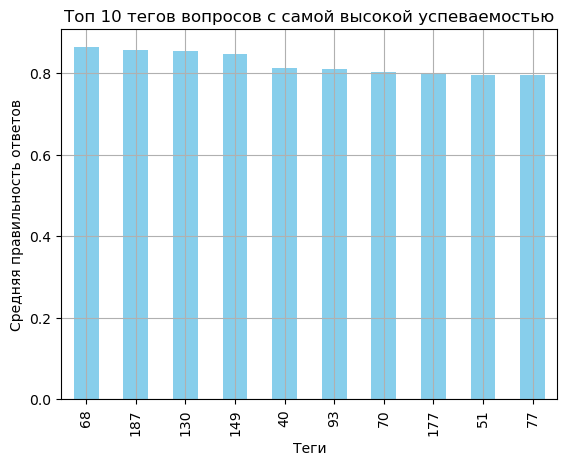

In [13]:
tags_correctness.sort_values(ascending=False).head(10).plot(kind="bar", color="skyblue")
plt.title("Топ 10 тегов вопросов с самой высокой успеваемостью")
plt.xlabel("Теги")
plt.ylabel("Средняя правильность ответов")
plt.grid()
plt.show()